<a href="https://colab.research.google.com/github/matheusgneves/data-science-projects/blob/main/Regress%C3%A3o_linear_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
df_hoteis = pd.read_csv('/content/hoteis.csv')
df_hoteis.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


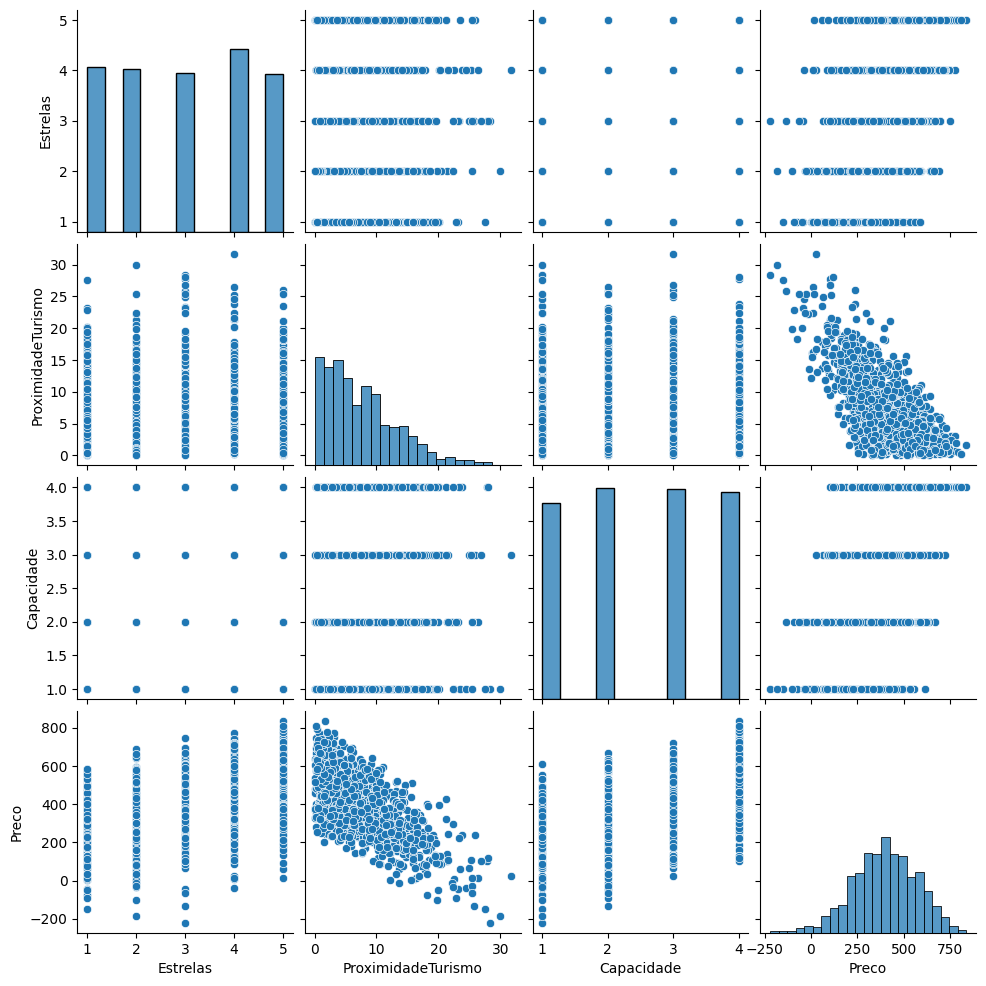

In [ ]:
sns.pairplot(df_hoteis)

In [ ]:
corr = df_hoteis.corr()
corr

,Estrelas,ProximidadeTurismo,Capacidade,Preco
Estrelas,1.000000,0.005237,-0.023200,0.401099
ProximidadeTurismo,0.005237,1.000000,-0.027050,-0.697142
Capacidade,-0.023200,-0.027050,1.000000,0.531866
Preco,0.401099,-0.697142,0.531866,1.000000


In [ ]:
corr['Preco']

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


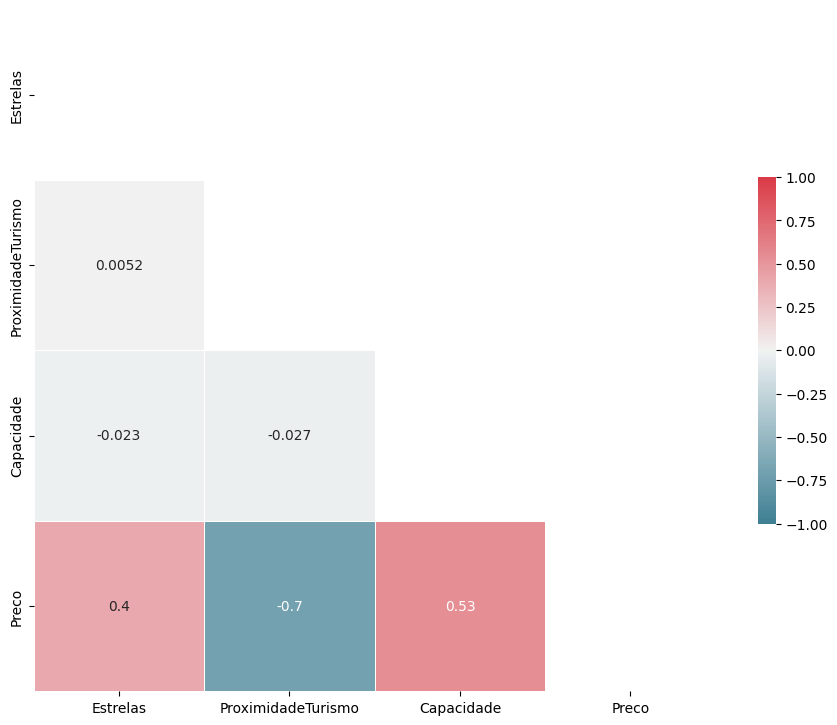

In [ ]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo dados
dados = pd.read_csv('/content/hoteis.csv')

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

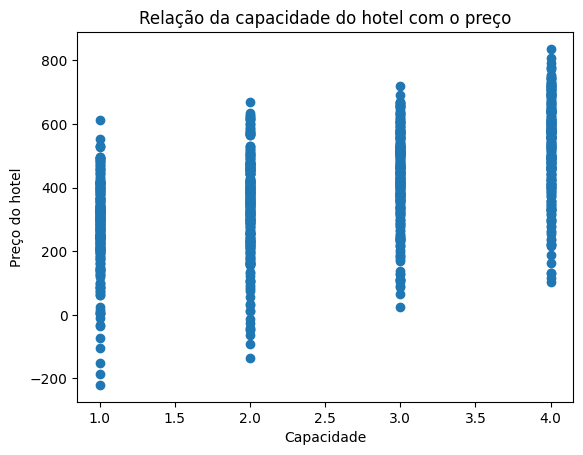

In [ ]:
plt.scatter(df_hoteis['Capacidade'], df_hoteis['Preco'])
plt.title('Relação da capacidade do hotel com o preço')
plt.xlabel('Capacidade')
plt.ylabel('Preço do hotel')
plt.show()

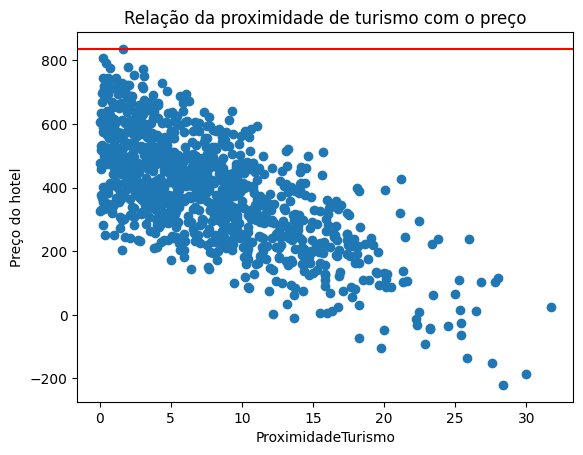

In [ ]:
plt.scatter(df_hoteis['ProximidadeTurismo'], df_hoteis['Preco'])
plt.axline(xy1=(0, df_hoteis['Preco'].max()), slope=0, color='red')

plt.title('Relação da proximidade de turismo com o preço')
plt.xlabel('ProximidadeTurismo')
plt.ylabel('Preço do hotel')
plt.show()

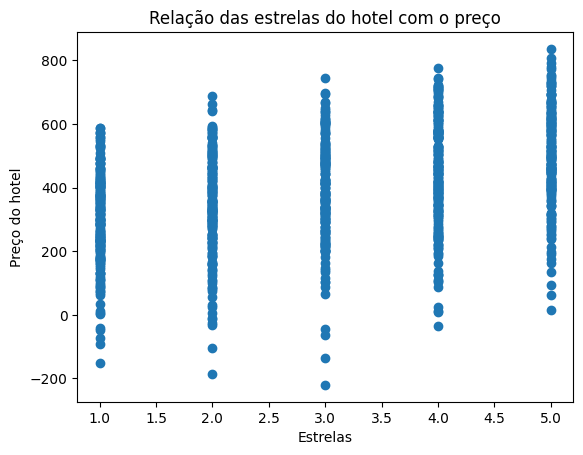

In [ ]:
plt.scatter(df_hoteis['Estrelas'], df_hoteis['Preco'])
plt.title('Relação das estrelas do hotel com o preço')
plt.xlabel('Estrelas')
plt.ylabel('Preço do hotel')
plt.show()

In [ ]:
px.scatter(df_hoteis, x='ProximidadeTurismo', y='Preco',
           trendline_color_override="red", trendline="ols")

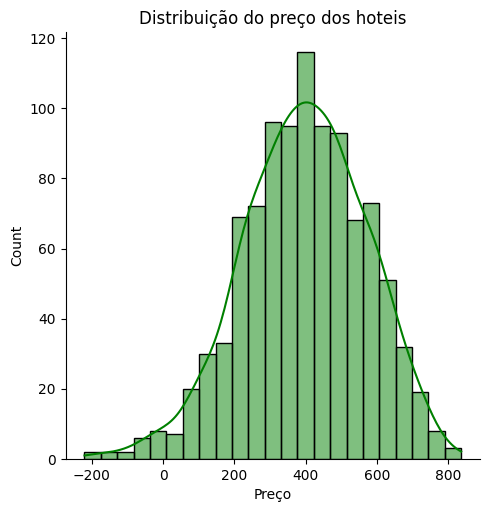

In [ ]:
sns.displot(df_hoteis['Preco'], kde=True, color='green')
plt.title('Distribuição do preço dos hoteis')
plt.xlabel('Preço')
plt.show()

In [ ]:
y = df_hoteis['Preco']
x = df_hoteis.drop(columns='Preco')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [ ]:
df_train = pd.DataFrame(x_train)
df_train['Preco'] = y_train
df_train.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
740,5,9.724029,3,445.356134
182,4,14.893560,4,371.505950
39,4,2.524966,1,436.534270
29,4,16.709430,2,236.329362
221,2,0.229598,1,354.218636


In [ ]:
modelo_0 = ols('Preco ~ Estrelas', data=df_train).fit()

In [ ]:
modelo_0.params

,0
Intercept,254.575451
Estrelas,48.118557


In [ ]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           2.27e-27
Time:                        22:50:06   Log-Likelihood:                -4533.1
No. Observations:                 700   AIC:                             9070.
Df Residuals:                     698   BIC:                             9079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.5755     14.302     17.800      0.0

In [ ]:
modelo_0.rsquared

np.float64(0.15499226890449191)

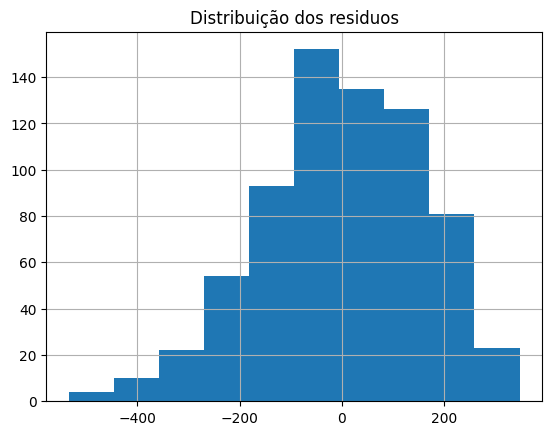

In [ ]:
modelo_0.resid.hist()
plt.title('Distribuição dos residuos')
plt.show()

In [ ]:
y_predict = modelo_0.predict(x_test)

In [ ]:
print('R²: ', r2_score(y_test, y_predict))

R²:  0.16757709626469786


In [ ]:
x_train = sm.add_constant(x_train)

In [ ]:
x_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [ ]:
modelo_1 = sm.OLS(y_train,
                  x_train[['const',
                          'Estrelas',
                          'ProximidadeTurismo',
                          'Capacidade']]).fit()

In [ ]:
modelo_2 = sm.OLS(y_train,
                  x_train[['const',
                          'ProximidadeTurismo',
                          'Capacidade']]).fit()

In [ ]:
modelo_3 = sm.OLS(y_train,
                  x_train[['const',
                          'Estrelas',
                          'Capacidade']]).fit()

In [ ]:
modelo_4 = sm.OLS(y_train,
                  x_train[['const',
                          'Estrelas',
                          'ProximidadeTurismo']]).fit()

In [ ]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:58:05   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.1576      6

In [ ]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1066.
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          9.00e-213
Time:                        22:58:11   Log-Likelihood:                -4101.7
No. Observations:                 700   AIC:                             8209.
Df Residuals:                     697   BIC:                             8223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                355.0018      9

In [ ]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     281.1
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           3.01e-90
Time:                        22:58:14   Log-Likelihood:                -4385.0
No. Observations:                 700   AIC:                             8776.
Df Residuals:                     697   BIC:                             8790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4104     16.170      2.375      0.0

In [ ]:
print(modelo_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     625.5
Date:                Fri, 05 Sep 2025   Prob (F-statistic):          2.79e-156
Time:                        22:58:19   Log-Likelihood:                -4232.3
No. Observations:                 700   AIC:                             8471.
Df Residuals:                     697   BIC:                             8484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                409.2894     10

In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)
print("Modelo 4: ", modelo_4.rsquared)

R²
Modelo 0:  0.15499226890449191
Modelo 1:  0.9241850901112033
Modelo 2:  0.7536532740101605
Modelo 3:  0.44649104153622876
Modelo 4:  0.6421968356956186
